<h1 style='color: green; font-size: 36px; font-weight: bold;'>House Prices Regression</h1>

# <font color='red' style='font-size: 30px;'>1.2 About the dataset </font>
<hr style='border: 2px solid red;'>

## Description
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'> This project is about a company that sell houses. We have to analyse what are the factors that increase or decrease the price of a certain house;</p>
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>For this, data from the last 1440 homes sold were collected.;</p>

Data source: [Kaggle - House Prices](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

## Data info

The data can be analysed in the file named "data_description.txt" in the "data" folder 

# <font color='red' style='font-size: 30px;'>1.3 Setting project</font>
<hr style='border: 2px solid red;'>

## Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sample_submission = pd.read_csv("data/sample_submission.csv")
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

frames = [train, test]

df = pd.concat(frames)

## Pandas Option 

In [3]:
pd.set_option('display.max_columns', None)

## Visualizing datasets

In [4]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


# <font color='red' style='font-size: 30px;'>1.4 Analyzing missing values </font>
<hr style='border: 2px solid red;'>

In [5]:
def columns_with_na(data):
    """ 
    Parameters 
    -----------
    data: pandas.core.frame.DataFrame
        DataFrame for be analyzed
    """
    
    coll = []
    lenn = len(data)
    for col in data.columns:
        if data[col].count() < lenn:
            coll.append(col)
    return coll

## Function for verify missing Values 

In [6]:
# Here i create this function for verify whats missing values my dataframe has
def verify_missing_values(data, variable, start_column):
    """
    Parameters
    ------------
    data: pandas.core.frame.DataFrame
        DataFrame for be analyzed
    column: pandas.core.series.Series
        Column for be analyzed
    start_column: int, default 0
        Define what columns will be visualized first
    """
    missing_values = data[variable].isnull()
    missing_values = data[missing_values]
    return missing_values.iloc[:, start_column:]

### Function for fill NaN

In [7]:
def filling_nan(column, fill):
    """
    Parameters 
    ------------
    column: pandas.core.series.Series
        Column for be analyzed
    fill: str or int
        Defines how will be filled the column
    """
    column.fillna(value = fill, inplace = True)

In [8]:
columns_with_na(df)

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SalePrice']

In [9]:
verify_missing_values(df, "Electrical", 0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,NaN,754,640,0,1394,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500.0


### Removing NaN

In [10]:
df.dropna(subset = 'SalePrice', inplace = True)
df.dropna(subset = 'Electrical', inplace = True)

In [11]:
verify_missing_values(df, "Electrical", 0)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### Filling missing values

In [12]:
columns_no_basement = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF1', 'BsmtFinSF2']
columns_no_garage = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

_ = [filling_nan(df[column], 'No Basement') for column in columns_no_basement]
_ = [filling_nan(df[column], 'No Garage') for column in columns_no_garage]
_ = [filling_nan(df[column], 'None') for column in ['MasVnrType', 'MiscFeature']]
_ = [filling_nan(df[column], 'Other') for column in ['Exterior1st', 'Exterior2nd']]

filling_nan(df['Alley'], 'No alley access')
filling_nan(df['MasVnrArea'], 0)
filling_nan(df['FireplaceQu'], "No Fireplace")
filling_nan(df['PoolQC'], "No Pool")
filling_nan(df['Fence'], "No Fence")

In [13]:
# about LotFrontage -> try predict the missing values, puting LotFrontage as response value, if it doest work so put as 0
# # -> For now I will leave it as below
df["LotFrontage"].fillna(value = 0, inplace = True)

# about v -> search about "dummy variables" for solver this problem. 
# this case houses that don't have a garage, won't have a year since the garage was built
# -> For now I will leave it as below
df['GarageYrBlt'].fillna(df['YearBuilt'], inplace=True)

In [14]:
columns_with_na(df)

[]

# <font color='red' style='font-size: 30px;'>1.5 Analyzing SalePrice</font>
<hr style='border: 2px solid red;'>

In [15]:
sale_price = df['SalePrice']
sale_price.describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Histogram

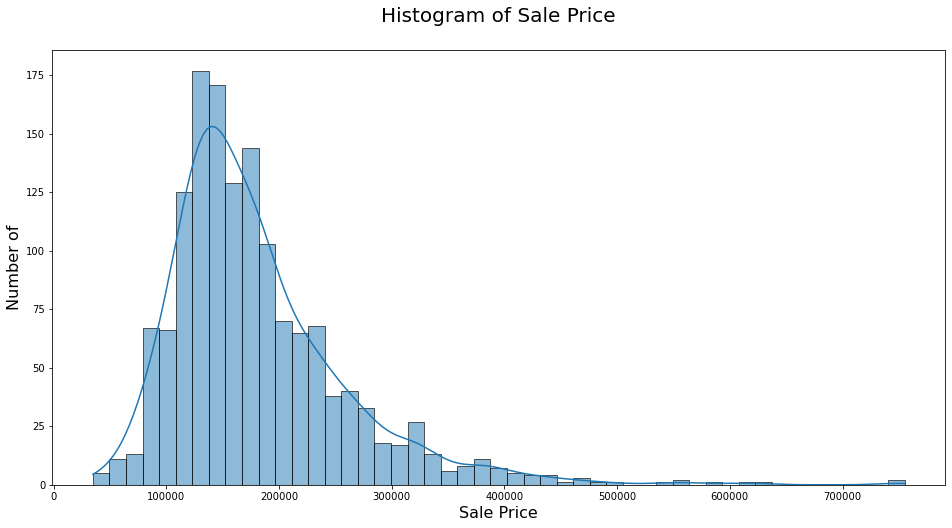

In [16]:
import seaborn as sns

ax = sns.histplot(
    sale_price, 
    kde = True,
)

ax.figure.set_size_inches(16, 8)
ax.set_title('Histogram of Sale Price', fontsize = 20, y = 1.05)
ax.set_xlabel('Sale Price', fontsize = 16)
ax.set_ylabel('Number of', fontsize = 16);

> Here, In the moment Sale Price is asymmetrical right

### Box plot 

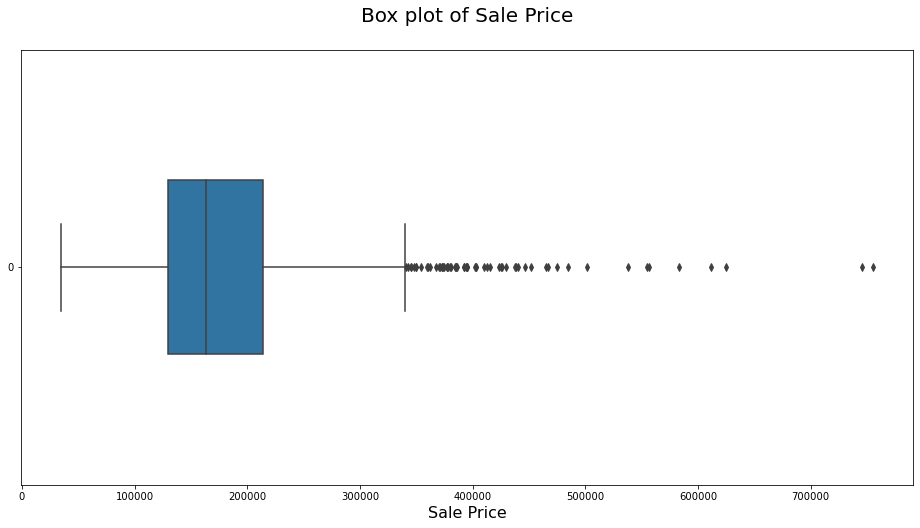

In [17]:
ax = sns.boxplot(
    data = sale_price, 
    orient = 'h',
    width = 0.4
)

ax.figure.set_size_inches(16, 8)
ax.set_title('Box plot of Sale Price', fontsize = 20, y = 1.05)
ax.set_xlabel('Sale Price', fontsize = 16);

# <font color='red' style='font-size: 30px;'>1.6 Removing outliers</font>
<hr style='border: 2px solid red;'>

In [18]:
q1 = sale_price.quantile(0.25)
q3 = sale_price.quantile(0.75)
iqr = q3 - q1
minimum = q1 - 1.5 * iqr
maximum = q3 + 1.5 * iqr

In [19]:
selection = (df['SalePrice'] >= minimum) & (df['SalePrice'] <= maximum)
new_df = df[selection]
sale_price = new_df['SalePrice']

### Histogram

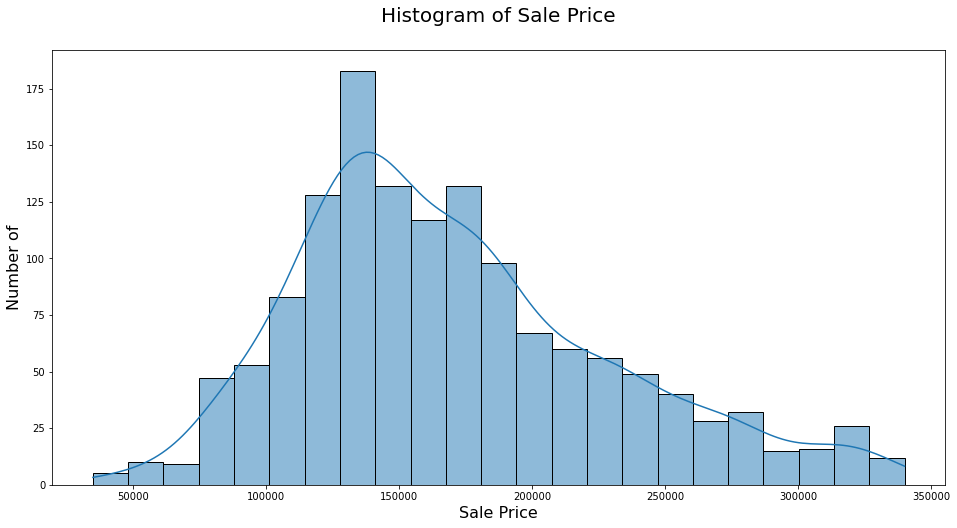

In [20]:
import seaborn as sns

ax = sns.histplot(
    sale_price, 
    kde = True,
)

ax.figure.set_size_inches(16, 8)
ax.set_title('Histogram of Sale Price', fontsize = 20, y = 1.05)
ax.set_xlabel('Sale Price', fontsize = 16)
ax.set_ylabel('Number of', fontsize = 16);

### Box plot 

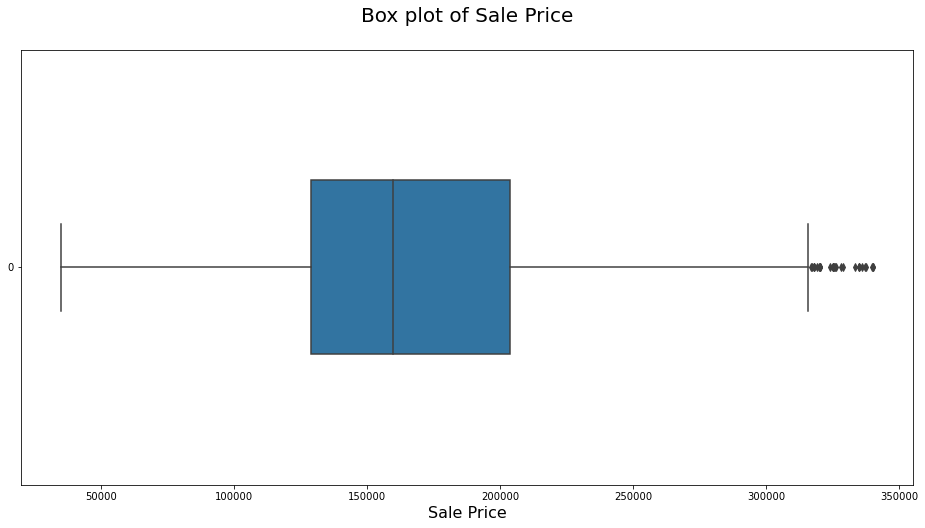

In [21]:
ax = sns.boxplot(
    data = sale_price, 
    orient = 'h',
    width = 0.4
)

ax.figure.set_size_inches(16, 8)
ax.set_title('Box plot of Sale Price', fontsize = 20, y = 1.05)
ax.set_xlabel('Sale Price', fontsize = 16);

# <font color='red' style='font-size: 30px;'>1.7 Checking correlations</font>
<hr style='border: 2px solid red;'>